In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns             # visualizations
import matplotlib.pyplot as plt   # visualizations
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

## Uploading data

In [14]:
df = pd.read_csv('../Dataset/cardio_train_cleaned_1.csv')
dfcol=df.columns
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1
4,8,60.038356,1,151,67.0,120,80,2,2,0,0,0,0


In [15]:
# import os
# cwd = os.getcwd()
# print(cwd)


## Checking if the targets are balanced

<AxesSubplot:xlabel='cardio', ylabel='count'>

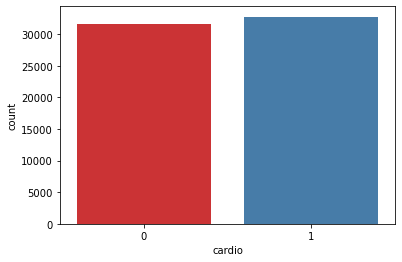

In [16]:
df[["cardio","height"]].groupby("cardio").count()
sns.countplot(x="cardio", data=df, palette="Set1")

## Data Transform (Scaling to avoid outliers)

In [17]:
from sklearn import preprocessing
scaler=preprocessing.MinMaxScaler()
dfscale=scaler.fit_transform(df)
dfscale2=pd.DataFrame(dfscale, columns=dfcol)
dfscale2.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.00000,0.586121,1.0,0.579487,0.269841,0.093750,0.733945,0.0,0.0,0.0,0.0,1.0,0.0
1,0.00001,0.728878,0.0,0.517949,0.391534,0.406250,0.825688,1.0,0.0,0.0,0.0,1.0,1.0
2,0.00002,0.622219,0.0,0.564103,0.280423,0.302083,0.642202,1.0,0.0,0.0,0.0,0.0,1.0
3,0.00003,0.526218,1.0,0.584615,0.375661,0.510417,0.917431,0.0,0.0,0.0,0.0,1.0,1.0
4,0.00008,0.860044,0.0,0.492308,0.296296,0.197917,0.733945,0.5,0.5,0.0,0.0,0.0,0.0


## Splitting data

In [18]:
xdf=dfscale2.iloc[:,0:11]
ydf=dfscale2.iloc[:,-1]

In [19]:
x_training, x_testing, y_training, y_testing = train_test_split(xdf, ydf, test_size = 0.2, random_state=123, stratify=ydf)

In [20]:
print(xdf.shape)

(64390, 11)


In [21]:
ydf.shape

(64390,)

## Neural Network

In [24]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import Nadam

In [42]:
batch_size = 10
epochs = 100
optimizer = Nadam(lr=0.01, beta_1=0.9)
dropout_rate = 0.1
weight_constraint = 2
neurons = 20

model = Sequential()
model.add(Dense(neurons, input_dim=11, activation='softsign', kernel_constraint=maxnorm(weight_constraint)))
model.add(Dropout(dropout_rate))
model.add(Dense(5, activation='softsign'))
model.add(Dropout(dropout_rate))
model.add(Dense(3, activation='softsign'))
model.add(Dropout(dropout_rate))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                240       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 105       
_________________________________________________________________
dropout_4 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 18        
_________________________________________________________________
dropout_5 (Dropout)          (None, 3)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [28]:
model.fit(x_training, y_training, batch_size=batch_size, epochs=epochs, verbose=1)
score = model.evaluate(x_training, y_training)
print("\n Training Accuracy:", score[1])
score = model.evaluate(x_testing, y_testing)
print("\n Testing Accuracy:", score[1])

Epoch 1/100
5152/5152 [==============================] - 3s 611us/step - loss: 0.5842 - accuracy: 0.7071
Epoch 2/100
5152/5152 [==============================] - 3s 634us/step - loss: 0.5776 - accuracy: 0.7097
Epoch 3/100
5152/5152 [==============================] - 3s 597us/step - loss: 0.5779 - accuracy: 0.7073
Epoch 4/100
5152/5152 [==============================] - 3s 600us/step - loss: 0.5794 - accuracy: 0.7092
Epoch 5/100
5152/5152 [==============================] - 3s 618us/step - loss: 0.5791 - accuracy: 0.7074
Epoch 6/100
5152/5152 [==============================] - 3s 600us/step - loss: 0.5786 - accuracy: 0.7069
Epoch 7/100
5152/5152 [==============================] - 3s 599us/step - loss: 0.5795 - accuracy: 0.7074
Epoch 8/100
5152/5152 [==============================] - 3s 597us/step - loss: 0.5787 - accuracy: 0.7071
Epoch 9/100
5152/5152 [==============================] - 3s 640us/step - loss: 0.5801 - accuracy: 0.7078
Epoch 10/100
5152/5152 [==============================]

5152/5152 [==============================] - 3s 613us/step - loss: 0.5812 - accuracy: 0.7071
Epoch 79/100
5152/5152 [==============================] - 3s 586us/step - loss: 0.5830 - accuracy: 0.7060
Epoch 80/100
5152/5152 [==============================] - 3s 586us/step - loss: 0.5828 - accuracy: 0.7060
Epoch 81/100
5152/5152 [==============================] - 3s 623us/step - loss: 0.5832 - accuracy: 0.7065
Epoch 82/100
5152/5152 [==============================] - 3s 617us/step - loss: 0.5832 - accuracy: 0.7045
Epoch 83/100
5152/5152 [==============================] - 3s 609us/step - loss: 0.5832 - accuracy: 0.7059
Epoch 84/100
5152/5152 [==============================] - 3s 596us/step - loss: 0.5833 - accuracy: 0.7046
Epoch 85/100
5152/5152 [==============================] - 3s 670us/step - loss: 0.5840 - accuracy: 0.7065
Epoch 86/100
5152/5152 [==============================] - 3s 640us/step - loss: 0.5859 - accuracy: 0.7047
Epoch 87/100
5152/5152 [==============================] - 3

## Prediction

<ipython-input-30-eb6ebe203d1a>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictionarray=prediction.astype(np.float)
C:\Users\Aditya\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pr', ylabel='Density'>

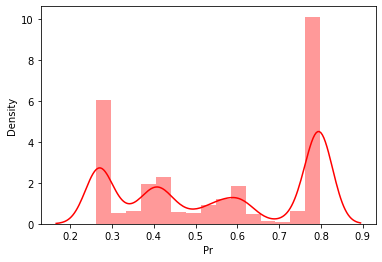

In [30]:
res=model.predict(x_testing)
res
resdf=pd.DataFrame(res, index=x_testing.index)
resdf.columns=["Pr"]
resdf["ID"]=range(12878)
resdf["y"]=np.where(resdf["Pr"]>=0.5,"1", "0")
resdf
prediction=resdf.drop(["Pr","ID"], axis=1)
predictionarray=prediction.astype(np.float)
sns.distplot(resdf["Pr"],  color="red")

### How many 1's and 0's predict the model

In [31]:
c1=resdf[['ID','y']].groupby('y').count()
c1

,ID
y,
0,5693
1,7185


### How many 1's and 0's are in the test sample

In [33]:
y_testingdf=pd.DataFrame(y_testing, index=y_testing.index)
y_testingdf["ID"]=range(12878)
y_test=y_testingdf.drop(["ID"], axis=1)
c2=y_testingdf[['ID','cardio']].groupby('cardio').count()
c2

,ID
cardio,
0.0,6327
1.0,6551


## Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test.values, predictionarray)
cm

array([[4137, 2190],
       [1556, 4995]], dtype=int64)

## Accuracy of the Model

In [35]:
Accuracy=cm[0,0]/(cm[0,0]+cm[1,0])
print("The accuracy of the model is: "+ str(Accuracy*100) + " %")

The accuracy of the model is: 72.66818900404004 %


## Predicting a single case

In [53]:
#INSERT DATA#
###############################################################################

day= 25 # day of bith 
month= 9 # month of bith (in numbers)
year= 1998 # year of bith
gender= 1 # 0 for women, 1 for men
height= 183 # in cm
weight= 80 # in kilograms
systolicbloodpressure= 120 # Systolic blood pressure
diastolicbloodpressure= 80 # Diastolic blood pressure
cholesterol= 1 # 1: normal, 2: above normal, 3: well above normal
gluc= 1 # 1: normal, 2: above normal, 3: well above normal
smoke= 0 # 1 if you smoke, 0 if not
alco= 0 # 1 if you drink alcohol, 0 if not
active= 1 # 1 if you do physical activity, 0 if not

##############################################################################
from datetime import date
f_date = date(year,month,day)
l_date = date.today()
delta = l_date - f_date
agedays=delta.days

agedayscale=(agedays-df["age"].min())/(df["age"].max()-df["age"].min())
heightscale=(height-df["height"].min())/(df["height"].max()-df["height"].min())
weightscale=(weight-df["weight"].min())/(df["weight"].max()-df["weight"].min())
sbpscale=(systolicbloodpressure-df["ap_hi"].min())/(df["ap_hi"].max()-df["ap_hi"].min())
dbpscale=(diastolicbloodpressure-df["ap_lo"].min())/(df["ap_lo"].max()-df["ap_lo"].min())
cholesterolscale=(cholesterol-df["cholesterol"].min())/(df["cholesterol"].max()-df["cholesterol"].min())
glucscale=(gluc-df["gluc"].min())/(df["gluc"].max()-df["gluc"].min())

single=np.array([agedayscale, gender, heightscale, weightscale, sbpscale, dbpscale, cholesterolscale, glucscale, smoke, alco, active ])
singledf=pd.DataFrame(single)
final=singledf.transpose()
final

,0,1,2,3,4,5,6,7,8,9,10
0,254.178155,1.0,0.65641,0.365079,0.197917,0.733945,0.0,0.0,0.0,0.0,1.0


In [54]:
finalres=model.predict(final) 
print("The probability of having or to have a Cardiovascular Disease is: "+ str(round(finalres[0,0]*100,2)) + "%")

The probability of having or to have a Cardiovascular Disease is: 69.15%


In [55]:
from keras.models import model_from_json

model.save_weights("weights_final.hdf5")
json_string = model.to_json()
modeltopredict = model_from_json(json_string)
modeltopredict.load_weights("weights_final.hdf5", by_name=False)

prediction=modeltopredict.predict(final)

if prediction[0,0]>=0.5:
    print("The probability of having or to have a Cardiovascular Disease is: "+ str(round(prediction[0,0]*100,2)) + "%")
    print("You must visit a doctor to check it :(")
elif prediction[0,0]<0.5 and prediction[0,0]>=0.3:
    print("The probability of having or to have a Cardiovascular Disease is: "+ str(round(prediction[0,0]*100,2)) + "%")
    print("Probably you are healthy :/ ")
else:
    print("The probability of having or to have a Cardiovascular Disease is: "+ str(round(prediction[0,0]*100,2)) + "%")
    print("You are healthy :) ")

The probability of having or to have a Cardiovascular Disease is: 69.15%
You must visit a doctor to check it :(


In [49]:
# import pickle

# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)

TypeError: cannot pickle '_thread.RLock' object